# Project 20 Telecom Customer Churn Prediction 
-->Aim is to predict weather the Telecom customer will churn or not.

## Lets load the important libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('telecom_customer.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data['TotalCharges']=data['TotalCharges'].str.split(' ').str[0]

In [8]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], downcast="float")
data["TotalCharges"].fillna(0.0,inplace=True)

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float32'): Index(['TotalCharges'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object')}

In [12]:
data_int=data[['SeniorCitizen', 'tenure','TotalCharges','MonthlyCharges']].copy()

In [13]:
data_cat=data[['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].copy()

In [14]:
data_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [16]:
for i in data_cat:
    print(i)
    print(data[i].unique(),'\n')
    print(data[i].value_counts(),'\n')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

5835-BEQEU    1
3537-RYBHH    1
1135-LMECX    1
1320-HTRDR    1
8388-FYNPZ    1
             ..
6308-CQRBU    1
4146-SVFUD    1
1680-VDCWW    1
3352-RICWQ    1
6421-SZVEM    1
Name: customerID, Length: 7043, dtype: int64 

gender
['Female' 'Male'] 

Male      3555
Female    3488
Name: gender, dtype: int64 

Partner
['Yes' 'No'] 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
['No' 'Yes'] 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService
['No' 'Yes'] 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines
['No phone service' 'No' 'Yes'] 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService
['DSL' 'Fiber optic' 'No'] 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity
['No' 'Yes' 'No internet serv

In [17]:
data.drop(['customerID'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
for cat in data_cat:
    data_cat[cat]=le.fit_transform(data_cat[cat])

In [20]:
for i in data_cat:
    print(i)
    print(data_cat[i].unique(),'\n')
    print(data_cat[i].value_counts(),'\n')

customerID
[5375 3962 2564 ... 3367 5934 2226] 

2047    1
5368    1
1242    1
3291    1
5344    1
       ..
4687    1
2644    1
597     1
6742    1
0       1
Name: customerID, Length: 7043, dtype: int64 

gender
[0 1] 

1    3555
0    3488
Name: gender, dtype: int64 

Partner
[1 0] 

0    3641
1    3402
Name: Partner, dtype: int64 

Dependents
[0 1] 

0    4933
1    2110
Name: Dependents, dtype: int64 

PhoneService
[0 1] 

1    6361
0     682
Name: PhoneService, dtype: int64 

MultipleLines
[1 0 2] 

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64 

InternetService
[0 1 2] 

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64 

OnlineSecurity
[0 2 1] 

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup
[2 0 1] 

0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection
[0 2 1] 

0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64 

TechSupport
[0 2 1] 

0    3473
2    2044
1    1526
Name

In [21]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
customerID          7043 non-null int32
gender              7043 non-null int32
Partner             7043 non-null int32
Dependents          7043 non-null int32
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
Churn               7043 non-null int32
dtypes: int32(17)
memory usage: 467.8 KB


In [22]:
dataf=pd.concat([data_int,data_cat],axis=1)
dataf.head()

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.850000,29.85,5375,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,0,34,1889.500000,56.95,3962,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,0,2,108.150002,53.85,2564,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,0,45,1840.750000,42.30,5535,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,0,2,151.649994,70.70,6511,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


In [23]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
TotalCharges        7043 non-null float32
MonthlyCharges      7043 non-null float64
customerID          7043 non-null int32
gender              7043 non-null int32
Partner             7043 non-null int32
Dependents          7043 non-null int32
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
Churn               7043 non-null int32
dtypes: float32(1), float64(1), int32(17), int64(

In [24]:
x=dataf.iloc[:,:-1]
x.head()

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.850000,29.85,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,1889.500000,56.95,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,108.150002,53.85,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,1840.750000,42.30,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,151.649994,70.70,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [25]:
y=dataf.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [35]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=45)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=45)
GBC=GradientBoostingClassifier(random_state=45)
ABC=AdaBoostClassifier(random_state=45)
ETC=ExtraTreesClassifier(random_state=45)

In [36]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.759403832505323


Cross_Val_Score =  0.7611807990737862


roc_auc_score =  0.6825466945671549


classification_report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.55      0.52      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409



[[876 159]
 [180 194]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_

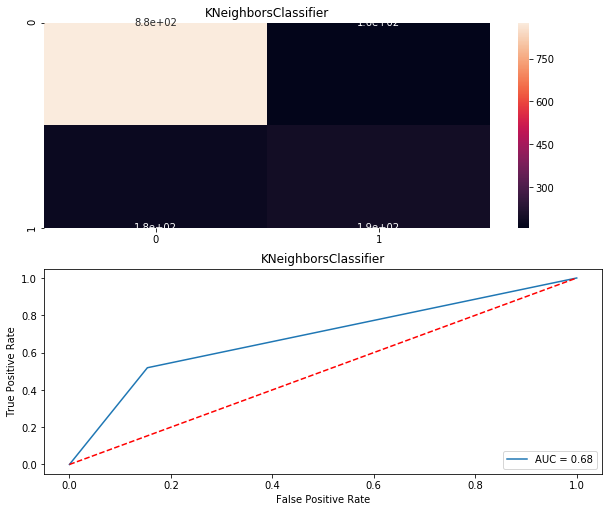

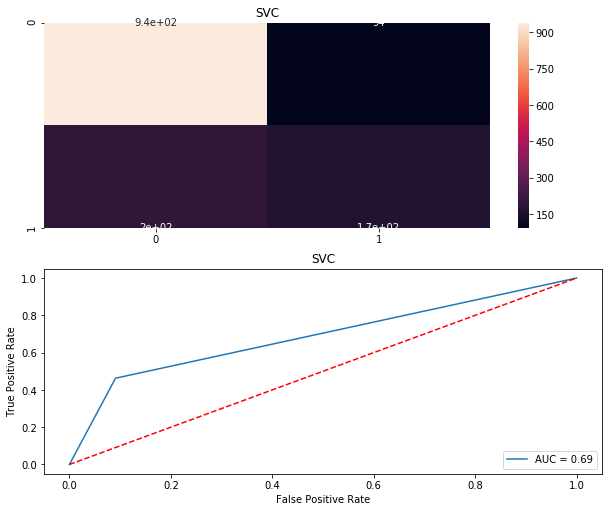

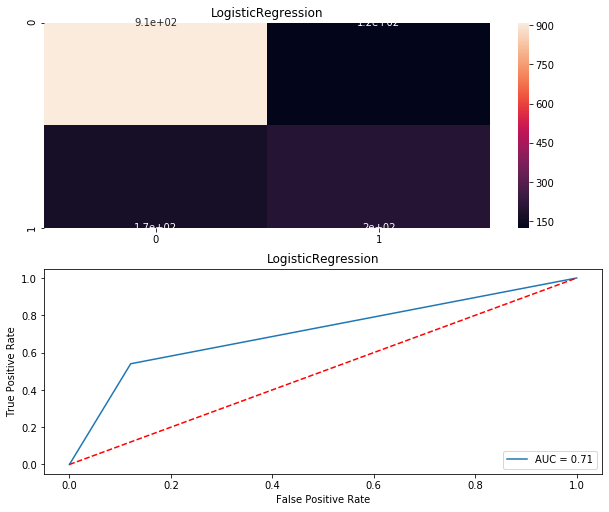

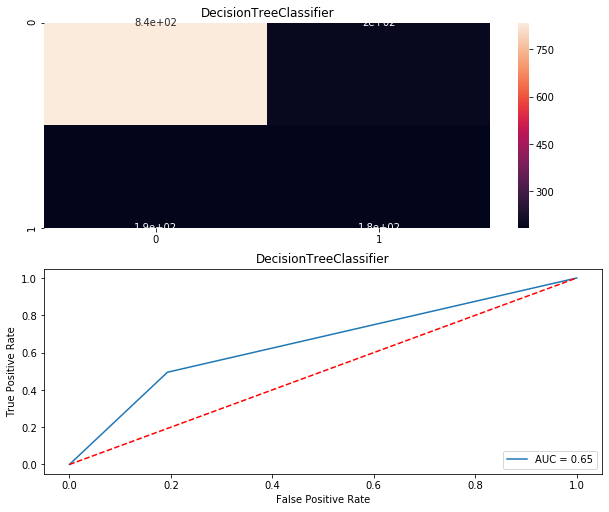

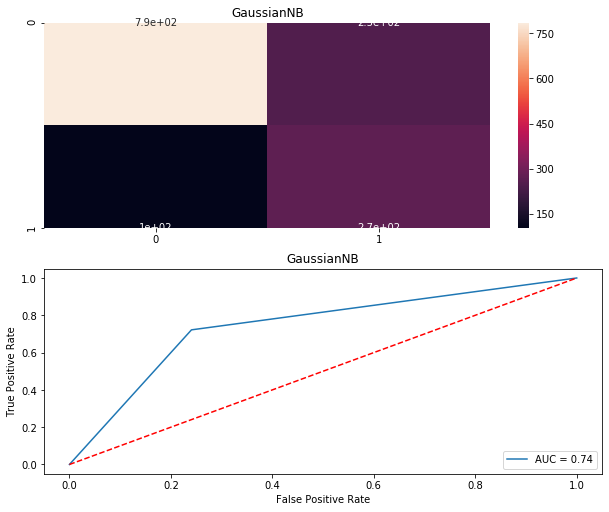

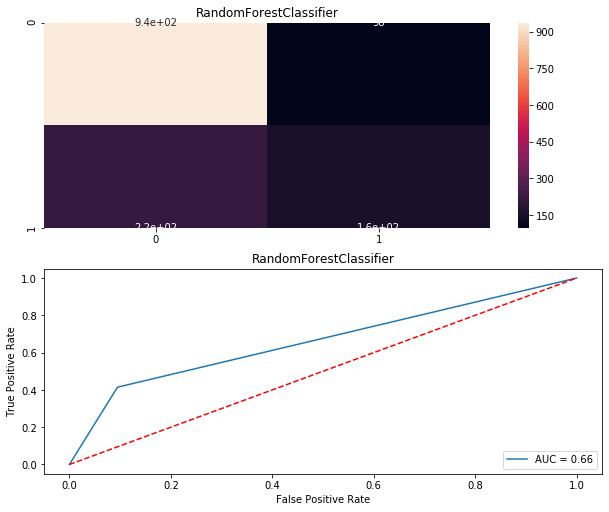

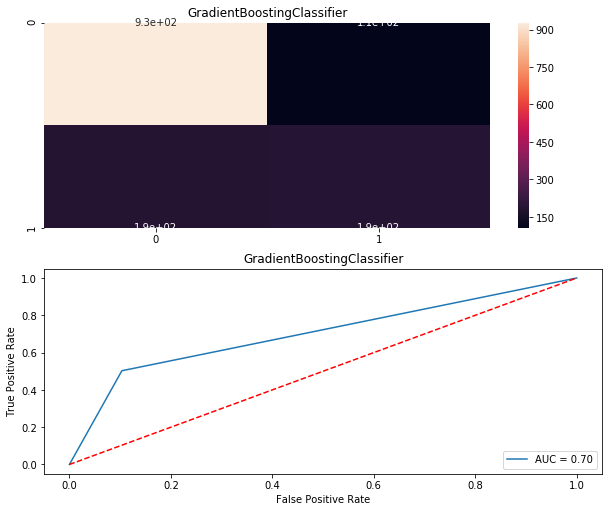

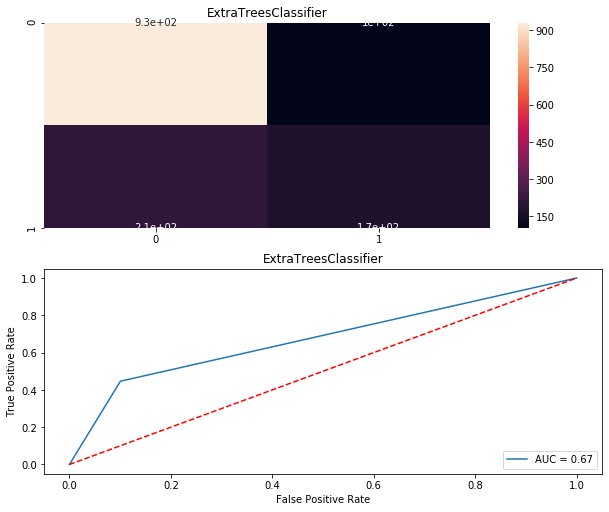

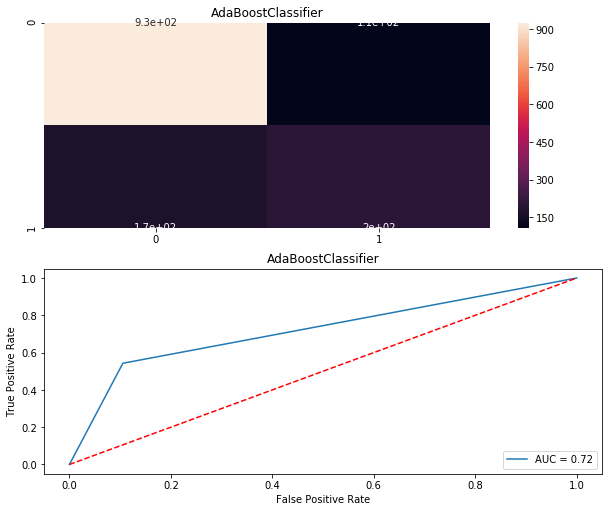

In [37]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [38]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.759404,0.761181,0.682547
1,SVC,0.790632,0.798383,0.685873
2,LogisticRegression,0.789212,0.804342,0.709667
3,DecisionTreeClassifier,0.723918,0.727959,0.650708
4,GaussianNB,0.749468,0.752093,0.740673
5,RandomForestClassifier,0.775018,0.785040,0.659876
6,GradientBoostingClassifier,0.792051,0.804913,0.699646
7,ExtraTreesClassifier,0.779276,0.779923,0.673020
8,AdaBoostClassifier,0.801278,0.796249,0.718733


However from the above we can see that the AdaBoost Classifier is working beter than others, so choose AdaBoost Classifier as my final model.

In [39]:
from sklearn.externals import joblib
joblib.dump(ABC,'Telecom_customer_churn_Prediction.obj')

['Telecom_customer_churn_Prediction.obj']

In [40]:
model=joblib.load('Telecom_customer_churn_Prediction.obj')

In [42]:
prediction=model.predict(x_test)

In [43]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Telecom_customer_churn_prediction_results.csv")